## RLDynamicHedger Generate Results All RL algorithms (Version 2)
 - This notebook is used to demo hedging performance calculations.
 - The calculations are for constant (GBM) and stochastic volatility scenarios (SABR and Hestion), specific details include:
     - Aggregated (mean) calculations of Black-Scholes and RL for deltas, pnl, reward and transaction cost
     - All 4 RL agents (DDPG, TD3, SAC and PPO) with Low expiry (3 months) option with daily hedging

#### Imports

In [1]:
import os, sys
import numpy as np
import pandas as pd
from typing import List
import time
import pandas as pd


SEED = 100
NEW_LINE = "\n"
LINE_DIVIDER = "==========" * 5

np.random.seed(SEED)

#### Import the experiment use cases module

In [2]:
from experiment_use_cases import run_scenario_map, getRunScenarioParams

Current path is: C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final...

Root folder: C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..


C:\Users\ADE\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Set current working directory..

In [3]:
ROOT_PATH = "../"
os.chdir(ROOT_PATH)
print(f"Current path is: {os.getcwd()}...{NEW_LINE}")
sys.path.insert(2, ROOT_PATH)

Current path is: C:\Development\Training\MLI Certificate of Finance\Final-Project\Project...



#### Libaries for RLDynamicHedger


In [4]:
from scripts.generate_hedger_rl_model_results_all_models import GenerateRLModelResults
from scripts.generate_hedger_all_hull_metrics_results import GenerateHullMetricsResults
from src.main.utility.enum_types import PlotType, AggregationType, HedgingType, RLAgorithmType
from src.main.market_simulator.parameters import Parameters
from src.main.utility.utils import Helpers
import src.main.configs_global as configs

Root folder: C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..


#### Set demo parameters

In [5]:
ALGORITHM_TYPES = [RLAgorithmType.ddpg, RLAgorithmType.td3, RLAgorithmType.sac, RLAgorithmType.ppo]
HEDGING_TYPES = [HedgingType.gbm, HedgingType.sabr, HedgingType.heston]
# USE_CASES = ["low_expiry", "high_expiry", "low_trading_cost", "high_trading_cost", "low_trading_freq","high_trading_freq", "high_moneyness", "low_moneyness"]
USE_CASES = ["low_expiry"]
PATH_INDEX = 0

#### Run the experiment cycle

In [6]:
def run(
    use_cases: List[str] = USE_CASES, 
    hedging_types: List[HedgingType] = HEDGING_TYPES,
    algo_types: List[RLAgorithmType] = None,
    sim_path_index: int = PATH_INDEX
):
    """
    Run the RL tuning/training cycles
    :param use_case: Use cases
    :param hedging_types: hedging types
    """
    start_time = time.process_time()
    print(f"Start of RL agent result generation cycles for 4 RL algorithms\n")
    parameter_settings_data = Helpers.getParameterSettings(configs.DEFAULT_SETTINGS_NAME)
    parameters = Parameters(**parameter_settings_data)
    is_recompute = False
    is_plot_2_screen = True
    is_test_env = True
    aggregation_type = AggregationType.mean
    for model_use_case in use_cases:
        for hedging_type in hedging_types:
            parameters.hedging_type = hedging_type
            run_scenario_parameters = getRunScenarioParams(parameters, scenario=model_use_case, is_test_env=is_test_env)
            print(f"Current experiment run is for:\nModel use case: {model_use_case}\nHedging_type:{hedging_type.name}\nis_recompute: {is_recompute}")
            hedge_model = GenerateRLModelResults(
                hedging_type, 
                is_recompute, 
                aggregation_type, 
                parameters=run_scenario_parameters, 
                model_use_case=model_use_case,
                algo_types_subset=algo_types,
                test_path_index=sim_path_index
            )
            hedge_model.run(is_plot_2_screen)
           
            print(f"{LINE_DIVIDER}\n\n\n")
    end_time = time.process_time()
    elapsed_time_sec = round(end_time - start_time, 4)
    elapsed_time_min = round(elapsed_time_sec/60, 4)
    print(f"End of result generation for all the {len(USE_CASES)} uses cases for {len(HEDGING_TYPES)}")
    print(f"Processing time was: {elapsed_time_sec} seconds | {elapsed_time_min} minutes")

2025-04-22 23:29:43,937 - INFO - generate_hedger_rl_model_results_all_models.py:__init__ - : RL Delta Hedger for 4 algorithm types for the hedging type HedgingType.gbm in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_rl_model_results_all_models.py:53
2025-04-22 23:29:43,947 - INFO - env.py:__init__ - : parameters:
Parameters(n_paths=1000, n_time_steps=63, n_days_per_year=252, trading_frequency=1.0, option_expiry_time=0.25, start_stock_price=100, strike_price=100, volatility=0.2, start_volatility=0.2, volatility_of_volatility=0.6, risk_free_rate=0.0, dividend_rate=0.0, return_on_stock=0.05, cost_per_traded_stock=0.01, rho=-0.4, stdev_coefficient=1.5, central_difference_spacing=0.01, notional=100, is_reset_path=False, is_test_env=True, hedging_type=<HedgingType.gbm: 1>, maturity_in_months=3, n_business_days=20, volatility_mean_reversion=1.0, long_term_volatility=0.04, volatility_correlation=-0.7, hedging_

Start of RL agent result generation cycles for 4 RL algorithms

Current experiment run is for:
Model use case: low_expiry
Hedging_type:gbm
is_recompute: False


2025-04-22 23:29:46,854 - INFO - td3_algorithm.py:__init__ - : Start of Reinforcement learning for environment: RL DELTA HEDGER in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\td3_algorithm.py:44
2025-04-22 23:29:46,854 - INFO - td3_algorithm.py:__init__ - : This RL environment uses a TD3 RL algorithm agent in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\td3_algorithm.py:45
2025-04-22 23:29:46,869 - INFO - base_algorithms.py:hyper_parameters - : Training is using tuned hyperparameters... in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\base_algorithms.py:131
2025-04-22 23:29:46,873 - INFO - base_algorithms.py:hyper_parameters - : Hyperparameters are:
{'gamma': 0.999, 'learning_rate': 0.00024981722017404766, 'batc

Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.074641 -0.177120
1.0             -0.094518 -0.068298
2.0             -0.064566 -0.180634
3.0              0.358831  0.332280
4.0              0.565383  0.514560
5.0              0.049146 -0.062169
6.0             -0.027474 -0.131745
7.0              0.385457  0.271610
8.0             -0.028338 -0.106006
9.0             -0.067414 -0.106206
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.126607  -0.240876
1.0              -0.102611  -0.071031
2.0              -0.170824  -0.289775
3.0               0.132020   0.109166
4.0               0.289708   0.186947
5.0              -0.096293  -0.210077
6.0              -0.085642  -0.171816
7.0               0.183853   0.023437
8.0              -0.073720  -0.134749
9

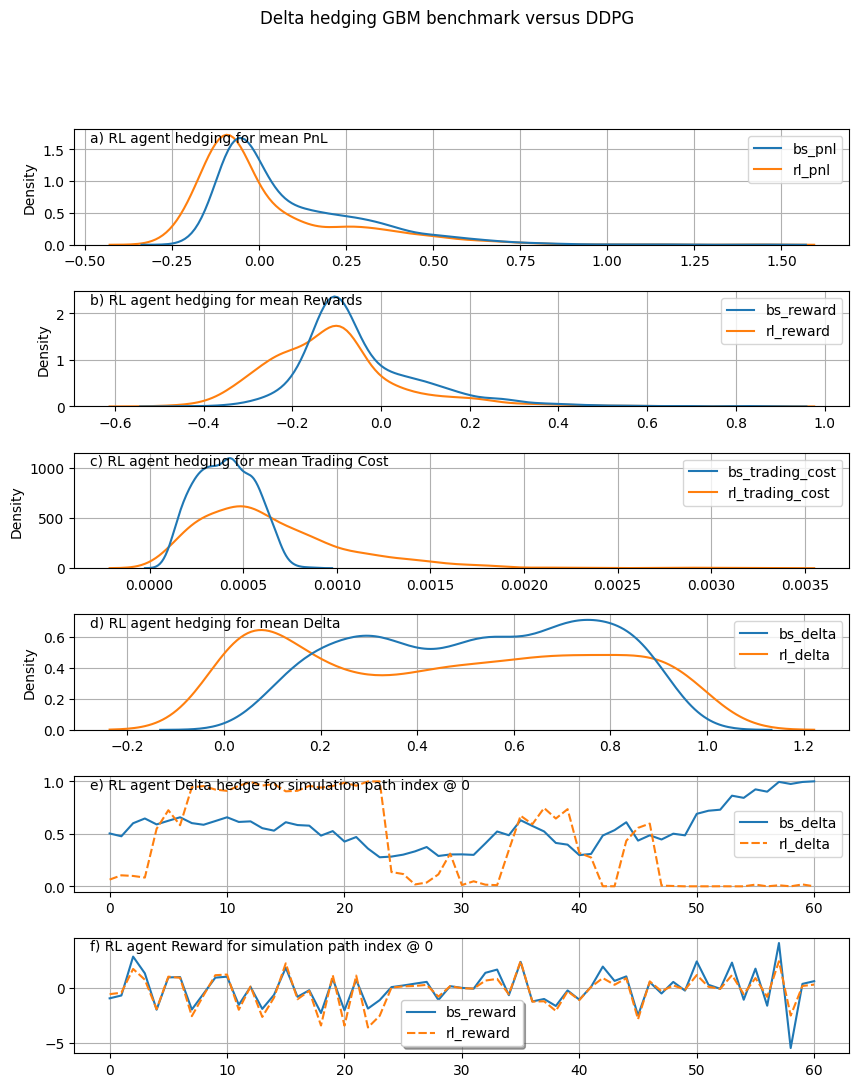

Iterating through RL models..:  25%|█████████████▎                                       | 1/4 [00:02<00:07,  2.59s/it]2025-04-22 23:29:49,621 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/td3/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:29:49,887 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.td3 RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.064566 -0.115755
1.0              0.358831  0.321657
2.0              0.565383  0.466510
3.0              0.049146 -0.000285
4.0             -0.027474 -0.077232
5.0              0.385457  0.268745
6.0             -0.028338 -0.081050
7.0             -0.067414 -0.067645
8.0              0.267273  0.221225
9.0              0.110779  0.071682
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.170824  -0.223765
1.0               0.132020   0.106695
2.0               0.289708   0.207647
3.0              -0.096293  -0.104823
4.0              -0.085642  -0.124075
5.0               0.183853   0.089058
6.0              -0.073720  -0.120643
7.0              -0.246400  -0.219958
8.0              -0.097384  -0.123199
9

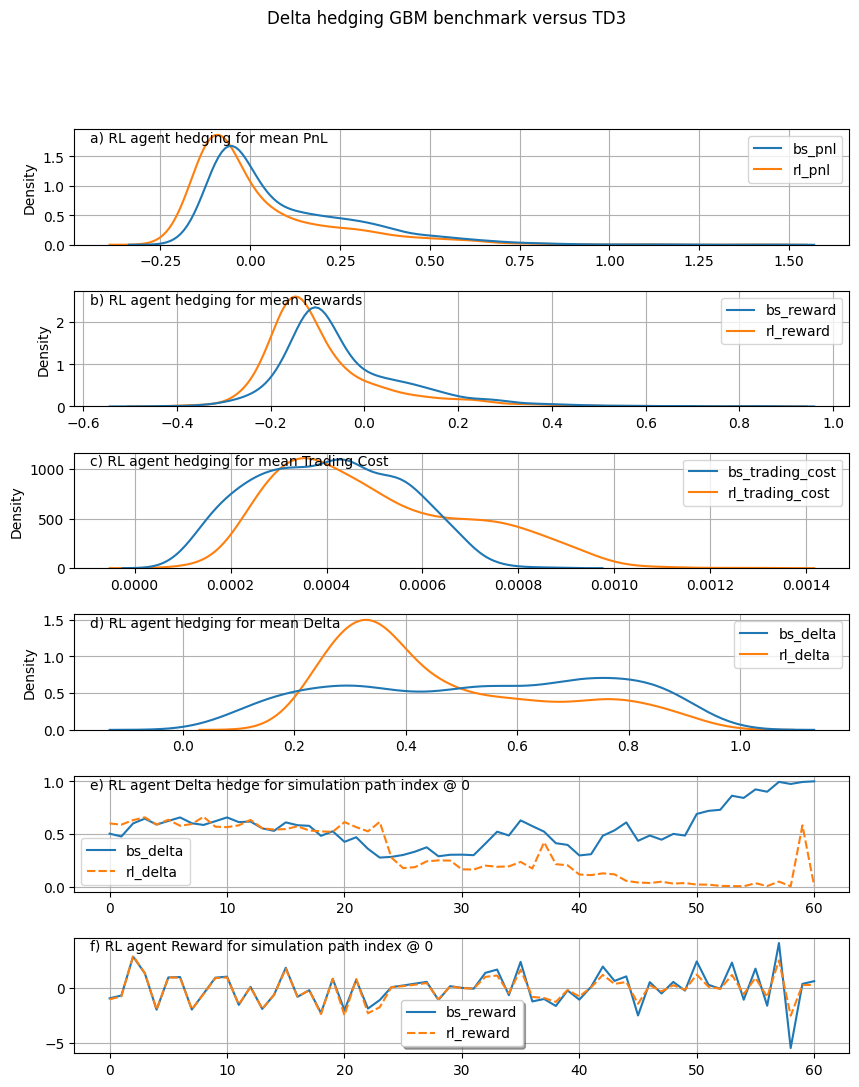

Iterating through RL models..:  50%|██████████████████████████▌                          | 2/4 [00:04<00:04,  2.43s/it]2025-04-22 23:29:51,918 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/sac/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:29:52,228 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.sac RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0              0.565383  0.438120
1.0              0.049146  0.094704
2.0             -0.027474 -0.113017
3.0              0.385457  0.330250
4.0             -0.028338 -0.168733
5.0             -0.067414 -0.051897
6.0              0.267273  0.162896
7.0              0.110779  0.088169
8.0             -0.040687 -0.153769
9.0              0.600905  0.491305
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0               0.289708   0.228334
1.0              -0.096293  -0.021182
2.0              -0.085642  -0.174705
3.0               0.183853   0.162271
4.0              -0.073720  -0.224315
5.0              -0.246400  -0.177669
6.0              -0.097384  -0.103257
7.0              -0.154889  -0.046246
8.0              -0.124575  -0.240762
9

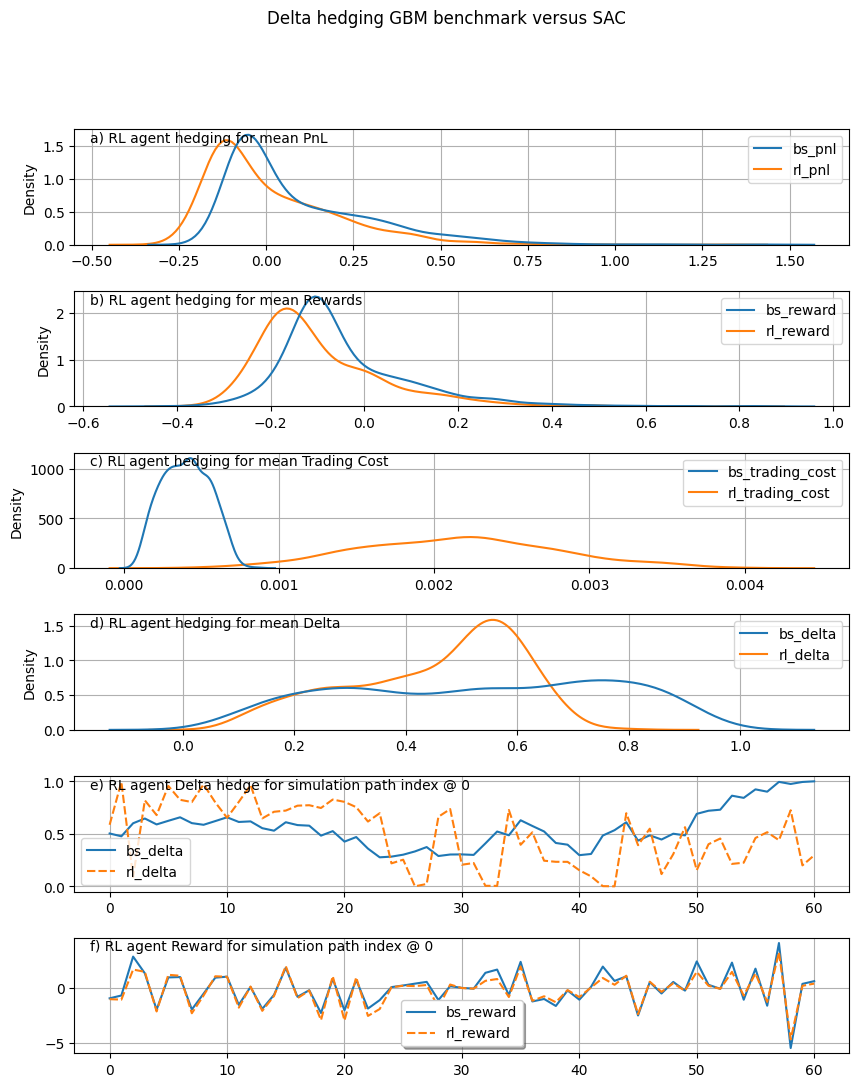

Iterating through RL models..:  75%|███████████████████████████████████████▊             | 3/4 [00:07<00:02,  2.45s/it]2025-04-22 23:29:54,402 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/ppo/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:29:54,712 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.ppo RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.027474 -0.085836
1.0              0.385457  0.095152
2.0             -0.028338 -0.015677
3.0             -0.067414 -0.001934
4.0              0.267273  0.177584
5.0              0.110779  0.131633
6.0             -0.040687 -0.008415
7.0              0.600905  0.467439
8.0             -0.053561 -0.142440
9.0             -0.058225 -0.156992
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.085642  -0.128799
1.0               0.183853  -0.069972
2.0              -0.073720  -0.066617
3.0              -0.246400  -0.158378
4.0              -0.097384  -0.101393
5.0              -0.154889  -0.082949
6.0              -0.124575  -0.080193
7.0               0.283937   0.205411
8.0              -0.085122  -0.181540
9

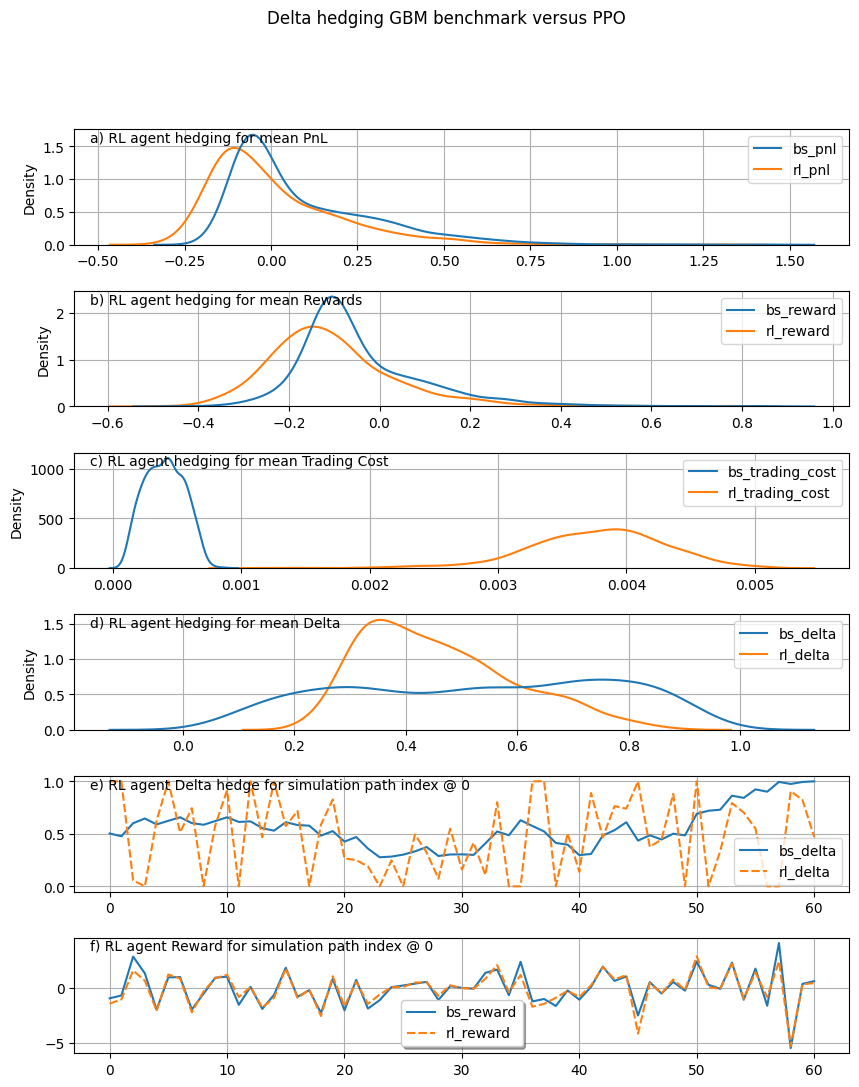

Iterating through RL models..: 100%|█████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.70s/it]
2025-04-22 23:29:57,820 - INFO - generate_hedger_rl_model_results_all_models.py:__init__ - : RL Delta Hedger for 4 algorithm types for the hedging type HedgingType.sabr in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_rl_model_results_all_models.py:53
2025-04-22 23:29:57,824 - INFO - env.py:__init__ - : parameters:
Parameters(n_paths=1000, n_time_steps=63, n_days_per_year=252, trading_frequency=1.0, option_expiry_time=0.25, start_stock_price=100, strike_price=100, volatility=0.2, start_volatility=0.2, volatility_of_volatility=0.6, risk_free_rate=0.0, dividend_rate=0.0, return_on_stock=0.05, cost_per_traded_stock=0.01, rho=-0.4, stdev_coefficient=1.5, central_difference_spacing=0.01, notional=100, is_reset_path=False, is_test_env=True, hedging_type=<HedgingType.sabr: 2>, maturity_in_mon




Current experiment run is for:
Model use case: low_expiry
Hedging_type:sabr
is_recompute: False


C:\Users\ADE\miniconda3\envs\hedging_env_3\lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 512, but because the `RolloutBuffer` is of size `n_steps * n_envs = 32`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 32
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=32 and n_envs=1)
  warnings.warn(
2025-04-22 23:29:58,017 - INFO - sac_algorithm.py:__init__ - : Start of Reinforcement learning for environment: RL DELTA HEDGER in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\sac_algorithm.py:44
2025-04-22 23:29:58,020 - INFO - sac_algorithm.py:__init__ - : This RL environment uses a SAC RL algorithm agent in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\sac_algorithm.py:45
2025-

Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0              0.087920 -0.021403
1.0              0.075277 -0.064550
2.0             -0.031300 -0.116112
3.0             -0.025535 -0.125513
4.0              0.542643  0.473931
5.0              0.091035  0.029218
6.0             -0.110886 -0.078092
7.0             -0.070249 -0.073970
8.0              0.242513  0.244081
9.0             -0.081909 -0.073513
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.107392  -0.231073
1.0              -0.063550  -0.225905
2.0              -0.104608  -0.159052
3.0              -0.107236  -0.195414
4.0               0.282800   0.207939
5.0              -0.113341  -0.164120
6.0              -0.120985  -0.081344
7.0              -0.096898  -0.084459
8.0               0.013967  -0.004849
9

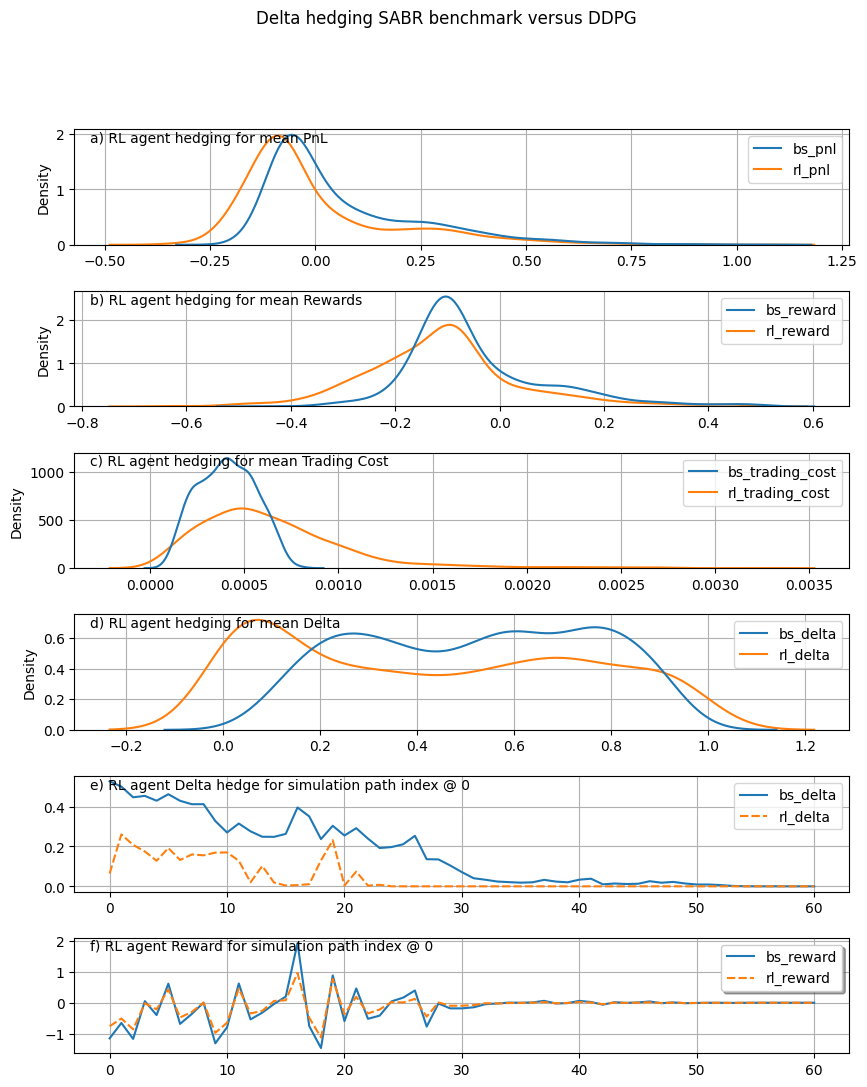

Iterating through RL models..:  25%|█████████████▎                                       | 1/4 [00:02<00:07,  2.36s/it]2025-04-22 23:30:00,434 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/td3/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:30:00,699 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.td3 RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.031300 -0.102617
1.0             -0.025535 -0.057535
2.0              0.542643  0.484846
3.0              0.091035  0.001984
4.0             -0.110886 -0.166805
5.0             -0.070249 -0.145863
6.0              0.242513  0.175097
7.0             -0.081909 -0.141111
8.0             -0.105924 -0.129762
9.0              0.248264  0.187330
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.104608  -0.152339
1.0              -0.107236  -0.119167
2.0               0.282800   0.242122
3.0              -0.113341  -0.152953
4.0              -0.120985  -0.190312
5.0              -0.096898  -0.191753
6.0               0.013967  -0.018005
7.0              -0.093167  -0.160688
8.0              -0.128412  -0.153187
9

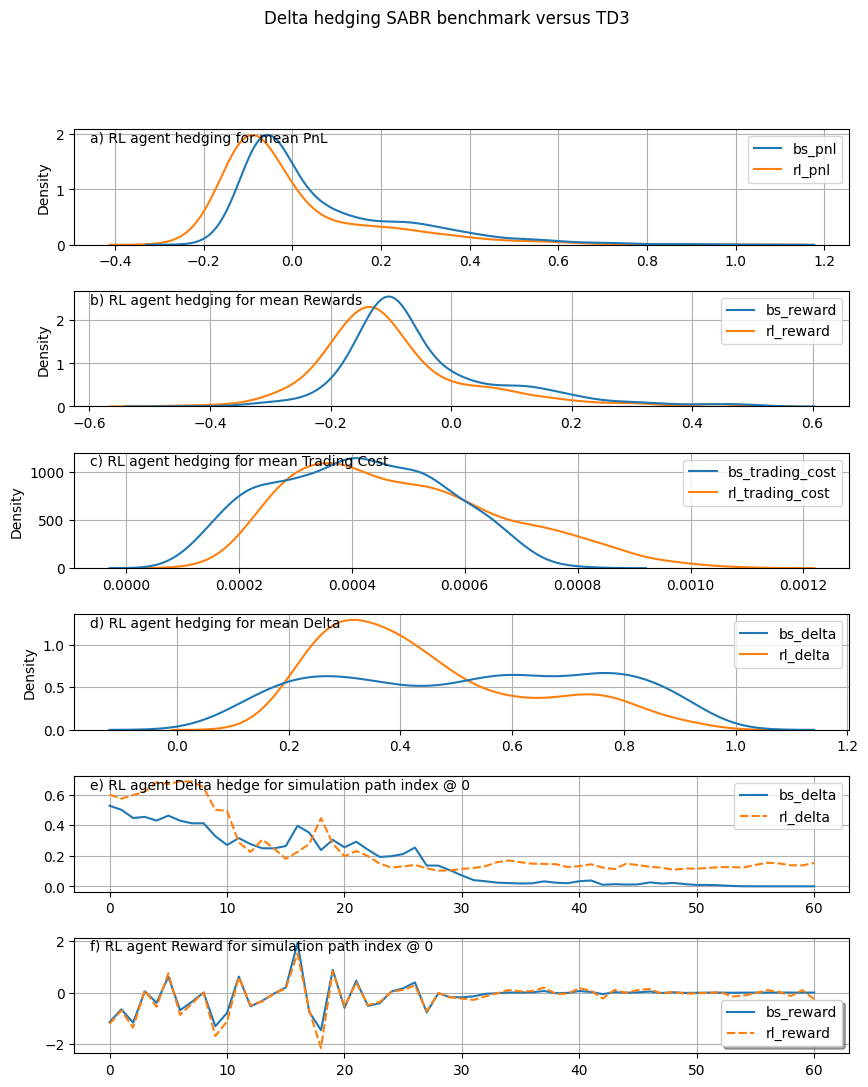

Iterating through RL models..:  50%|██████████████████████████▌                          | 2/4 [00:04<00:04,  2.43s/it]2025-04-22 23:30:02,902 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/sac/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:30:03,184 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.sac RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0              0.542643  0.415680
1.0              0.091035  0.038225
2.0             -0.110886 -0.149620
3.0             -0.070249 -0.172373
4.0              0.242513  0.132288
5.0             -0.081909 -0.131152
6.0             -0.105924 -0.119013
7.0              0.248264  0.130858
8.0              0.286987  0.239269
9.0             -0.064211 -0.193861
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0               0.282800   0.217434
1.0              -0.113341  -0.104600
2.0              -0.120985  -0.168482
3.0              -0.096898  -0.228619
4.0               0.013967  -0.003756
5.0              -0.093167  -0.153544
6.0              -0.128412  -0.152107
7.0               0.125854   0.050235
8.0               0.149469   0.144648
9

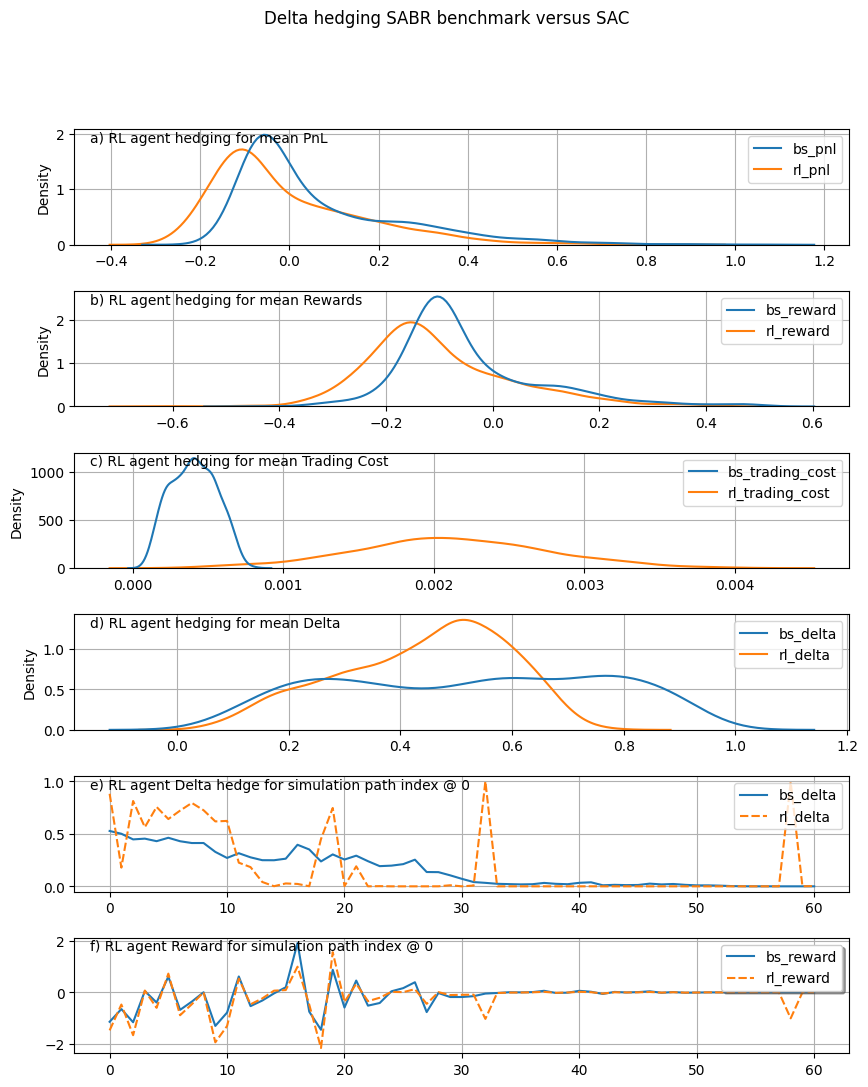

Iterating through RL models..:  75%|███████████████████████████████████████▊             | 3/4 [00:07<00:02,  2.45s/it]2025-04-22 23:30:05,369 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/ppo/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:30:05,637 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.ppo RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.110886 -0.166454
1.0             -0.070249 -0.194909
2.0              0.242513  0.195429
3.0             -0.081909 -0.122249
4.0             -0.105924 -0.146609
5.0              0.248264  0.160124
6.0              0.286987  0.171756
7.0             -0.064211 -0.155283
8.0              0.408269  0.322554
9.0             -0.048355 -0.132718
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.120985  -0.184583
1.0              -0.096898  -0.245441
2.0               0.013967  -0.001342
3.0              -0.093167  -0.141992
4.0              -0.128412  -0.178670
5.0               0.125854   0.060467
6.0               0.149469   0.069183
7.0              -0.252679  -0.338214
8.0               0.265274   0.211007
9

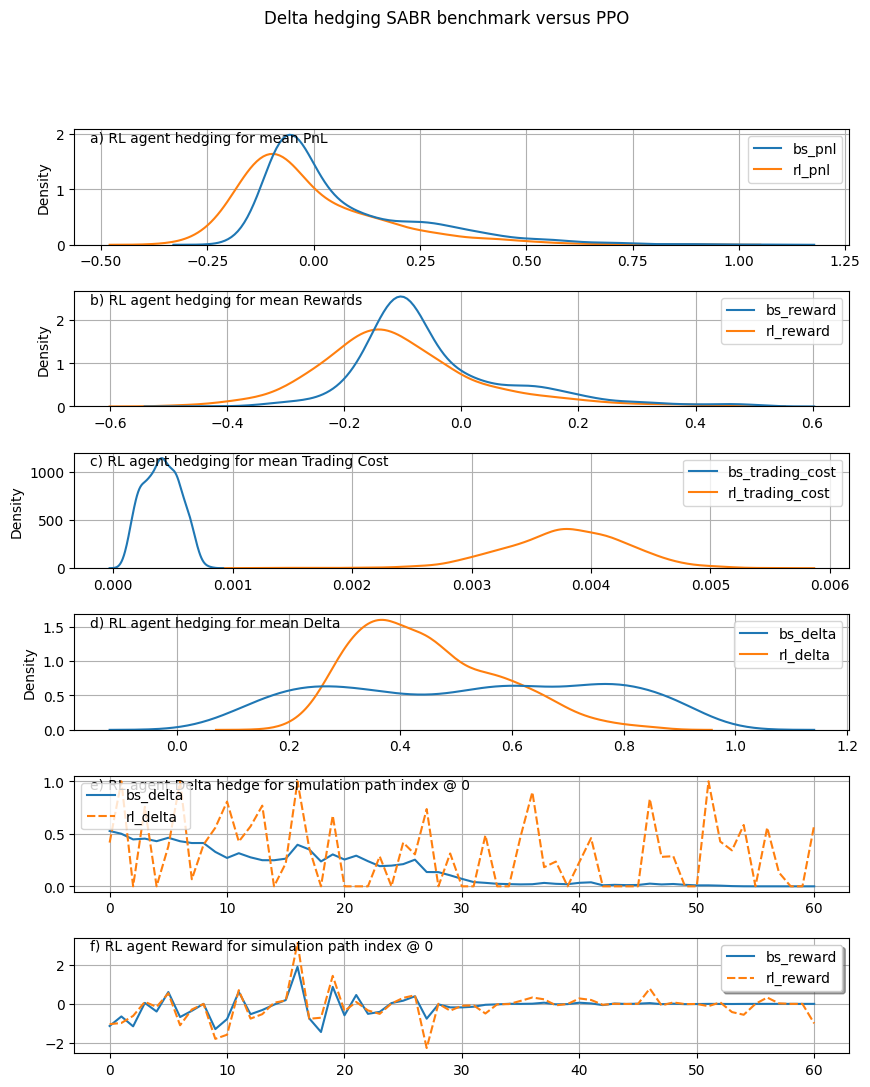

Iterating through RL models..: 100%|█████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.38s/it]
2025-04-22 23:30:07,611 - INFO - generate_hedger_rl_model_results_all_models.py:__init__ - : RL Delta Hedger for 4 algorithm types for the hedging type HedgingType.heston in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_rl_model_results_all_models.py:53
2025-04-22 23:30:07,614 - INFO - env.py:__init__ - : parameters:
Parameters(n_paths=1000, n_time_steps=63, n_days_per_year=252, trading_frequency=1.0, option_expiry_time=0.25, start_stock_price=100, strike_price=100, volatility=0.2, start_volatility=0.2, volatility_of_volatility=0.6, risk_free_rate=0.0, dividend_rate=0.0, return_on_stock=0.05, cost_per_traded_stock=0.01, rho=-0.4, stdev_coefficient=1.5, central_difference_spacing=0.01, notional=100, is_reset_path=False, is_test_env=True, hedging_type=<HedgingType.heston: 3>, maturity_in




Current experiment run is for:
Model use case: low_expiry
Hedging_type:heston
is_recompute: False


2025-04-22 23:30:07,794 - INFO - ppo_algorithm.py:__init__ - : This RL environment uses a PPO RL algorithm agent in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\ppo_algorithm.py:44
2025-04-22 23:30:07,801 - INFO - base_algorithms.py:hyper_parameters - : Training is using tuned hyperparameters... in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\main\rl_algorithms\train_evaluate_test\base_algorithms.py:131
2025-04-22 23:30:07,805 - INFO - base_algorithms.py:hyper_parameters - : Hyperparameters are:
{'batch_size': 512, 'n_steps': 32, 'gamma': 0.9999, 'learning_rate': 0.005741341322660863, 'ent_coef': 9.920270270139996e-07, 'clip_range': 0.9, 'n_epochs': 1, 'gae_lambda': 0.92, 'max_grad_norm': 1, 'vf_coef': 0.7269291743165629, 'sde_sample_freq': 16, 'policy_kwargs': {'net_arch': {'pi': [64], 'vf': [64]}, 'activation_fn': <class 'torch.nn.modules.

Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.136896 -0.312242
1.0             -0.145587 -0.179451
2.0             -0.058296 -0.379006
3.0             -0.062826 -0.280385
4.0             -0.211995 -0.227980
5.0              0.613883  0.517403
6.0             -0.009993 -0.303285
7.0              0.215747  0.035100
8.0              0.219526 -0.126574
9.0              0.482426  0.093321
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.477332  -0.842745
1.0              -0.215122  -0.208510
2.0              -0.329793  -0.772400
3.0              -0.277758  -0.507217
4.0              -0.918344  -1.116772
5.0              -0.936615  -1.073972
6.0              -0.484389  -0.637045
7.0              -0.661033  -0.790195
8.0              -0.617095  -0.898113
9

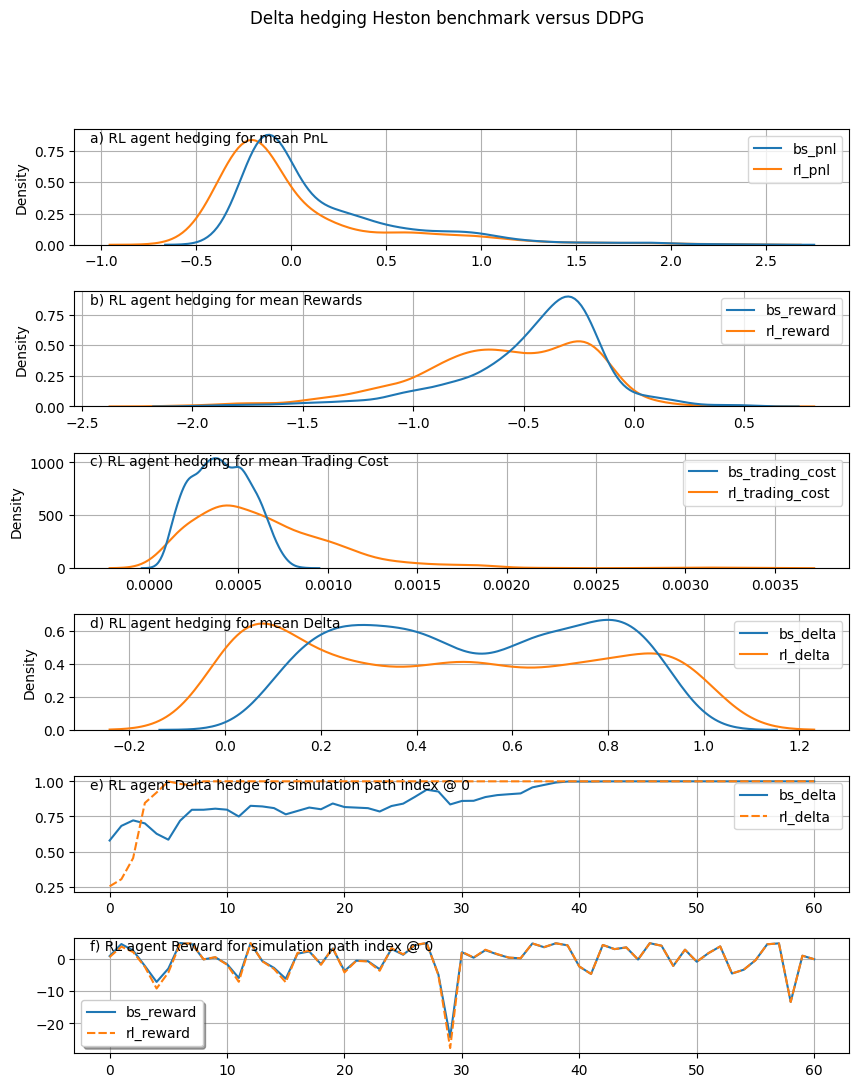

Iterating through RL models..:  25%|█████████████▎                                       | 1/4 [00:02<00:07,  2.36s/it]2025-04-22 23:30:10,215 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/td3/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:30:10,496 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.td3 RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.058296 -0.229081
1.0             -0.062826 -0.158280
2.0             -0.211995 -0.246709
3.0              0.613883  0.460592
4.0             -0.009993 -0.226843
5.0              0.215747 -0.008674
6.0              0.219526 -0.021518
7.0              0.482426  0.131144
8.0              0.819705  0.665997
9.0              0.022330 -0.100334
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.329793  -0.551497
1.0              -0.277758  -0.379377
2.0              -0.918344  -0.832713
3.0              -0.936615  -0.890229
4.0              -0.484389  -0.510558
5.0              -0.661033  -0.553783
6.0              -0.617095  -0.566533
7.0              -0.303559  -0.424896
8.0              -0.183067  -0.192756
9

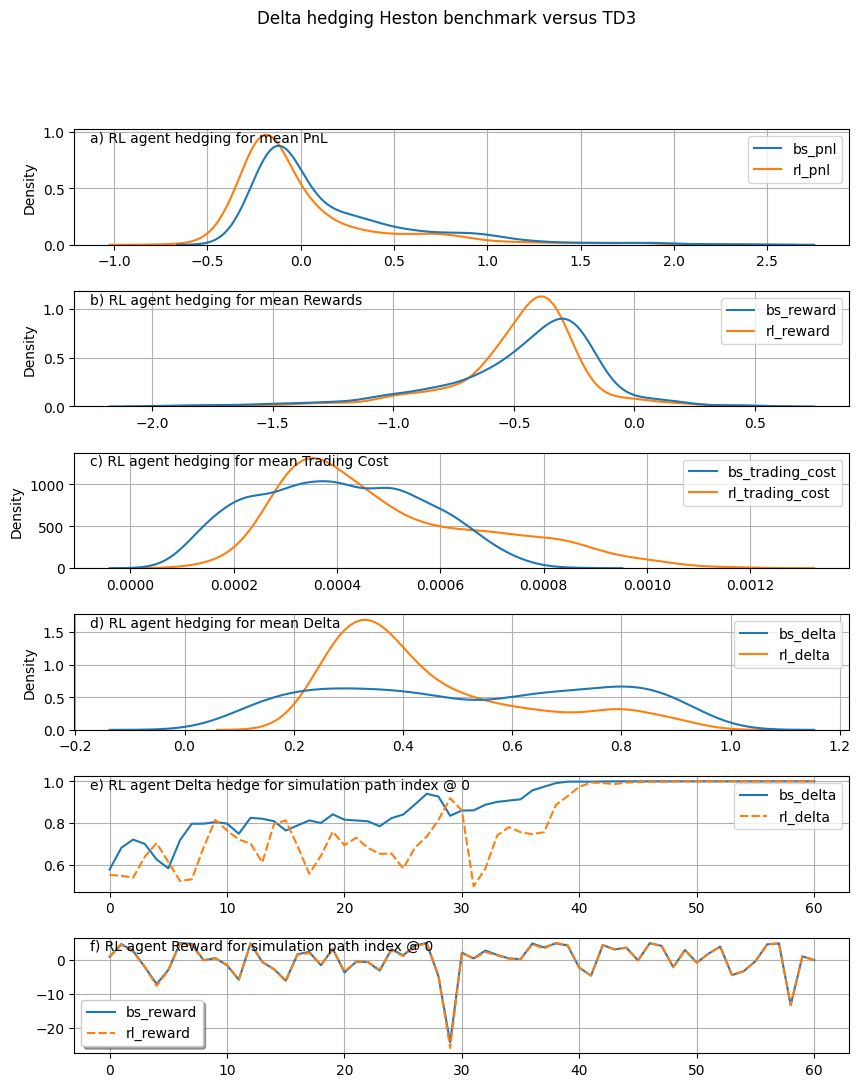

Iterating through RL models..:  50%|██████████████████████████▌                          | 2/4 [00:04<00:05,  2.52s/it]2025-04-22 23:30:12,855 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/sac/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:30:13,121 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.sac RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.211995 -0.252875
1.0              0.613883  0.040986
2.0             -0.009993 -0.211534
3.0              0.215747  0.212392
4.0              0.219526  0.057400
5.0              0.482426  0.219414
6.0              0.819705  0.552312
7.0              0.022330 -0.269062
8.0             -0.192041 -0.302970
9.0              0.651422  0.337894
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.918344  -0.776058
1.0              -0.936615  -0.906611
2.0              -0.484389  -0.715734
3.0              -0.661033  -0.410625
4.0              -0.617095  -0.457304
5.0              -0.303559  -0.217219
6.0              -0.183067  -0.080665
7.0              -0.147641  -0.471641
8.0              -0.257741  -0.438123
9

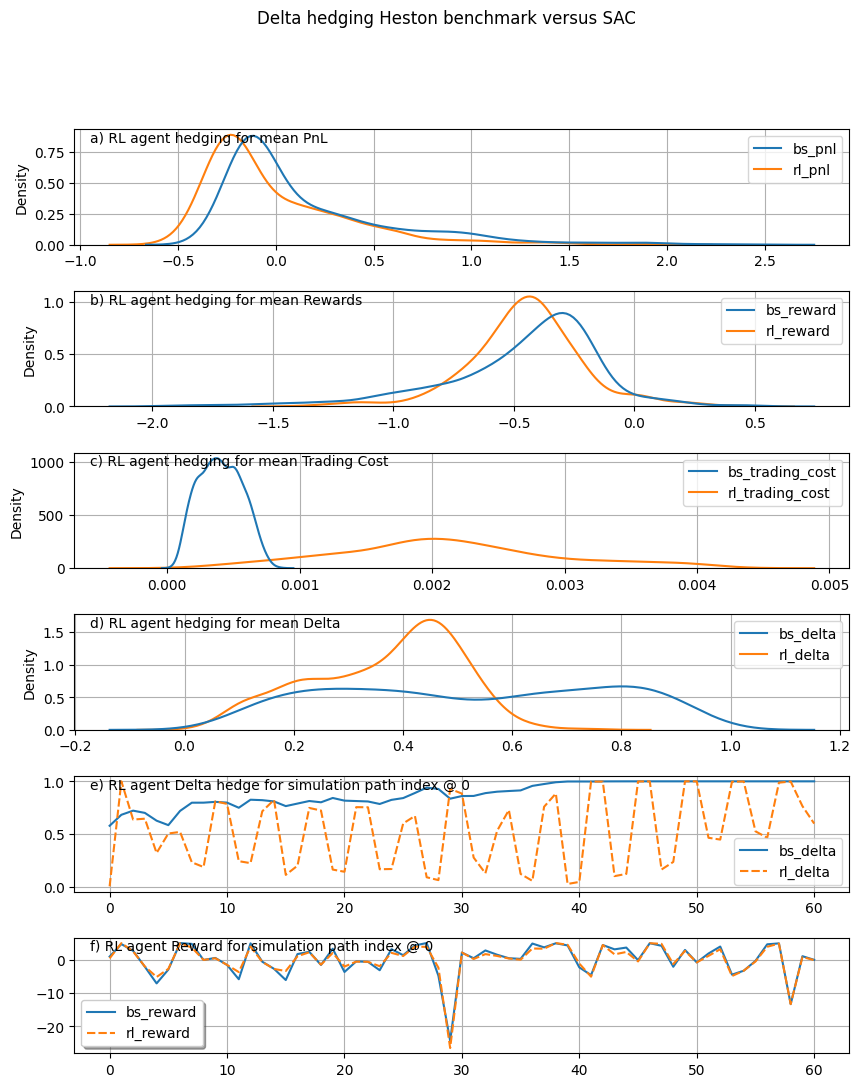

Iterating through RL models..:  75%|███████████████████████████████████████▊             | 3/4 [00:07<00:02,  2.41s/it]2025-04-22 23:30:15,136 - INFO - rl_algorithm_test_cycle.py:__init__ - : The RL model path use in this experiment is: model/trained-tuned-models/ppo/low_expiry/best_model.zip in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:96
2025-04-22 23:30:15,421 - INFO - rl_algorithm_test_cycle.py:getSinglePathResults - : Testing the RLAgorithmType.ppo RL agent for Simulation path: 0 in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\src\tests\rl_algorithms\train_evaluate_test\rl_algorithm_test_cycle.py:361


Sample of RL test cycle aggregate Pnl results with a total of 1000 rows:
                   bs_pnl    rl_pnl
simulation_path                    
0.0             -0.009993 -0.407070
1.0              0.215747  0.047377
2.0              0.219526  0.058420
3.0              0.482426  0.320651
4.0              0.819705  0.653429
5.0              0.022330 -0.205011
6.0             -0.192041 -0.253609
7.0              0.651422  0.382443
8.0             -0.072770 -0.225097
9.0              0.561596  0.372525
Sample of RL test cycle aggregate reward results with a total of 1000 rows:
                 bs_reward  rl_reward
simulation_path                      
0.0              -0.484389  -0.654473
1.0              -0.661033  -0.643415
2.0              -0.617095  -0.671320
3.0              -0.303559  -0.251109
4.0              -0.183067  -0.154635
5.0              -0.147641  -0.452802
6.0              -0.257741  -0.315860
7.0              -0.974061  -0.864783
8.0              -0.284550  -0.417003
9

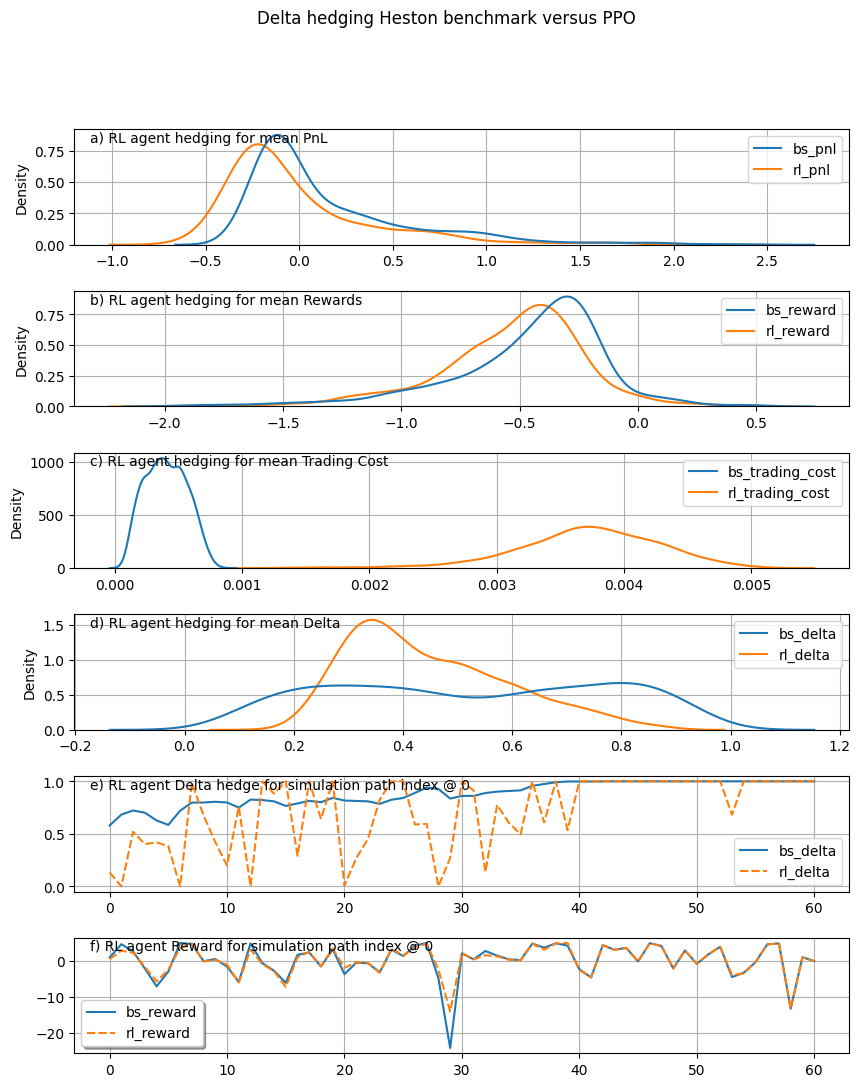

Iterating through RL models..: 100%|█████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.39s/it]




End of result generation for all the 1 uses cases for 3
Processing time was: 32.6406 seconds | 0.544 minutes


In [7]:
run(algo_types=ALGORITHM_TYPES)


#### Display the performance results for all the RL agents (all use cases)

In [8]:
def generateHullMetrics(
    algorithm_types: RLAgorithmType=ALGORITHM_TYPES,
    use_cases: str=USE_CASES
):
    """
    Generates the hull metrics for all the use cases
    :param algorithm_types: algorithm types
    :param hedging_types: Hedging types
    """
    print("Start of the generation of Hull metrics")    
    is_display_results_on_screen = True

    parameter_settings_data = Helpers.getParameterSettings(configs.DEFAULT_SETTINGS_NAME)
    parameters = Parameters(**parameter_settings_data)

    for use_case in use_cases:
        run_scenario_parameters = getRunScenarioParams(parameters, scenario=use_case)
        # run_scenario_parameters = None
        for algorithm_type in algorithm_types:
            generator = GenerateHullMetricsResults(
                algorithm_type=algorithm_type,
                extra_description=use_case,
                is_display_results_on_screen=is_display_results_on_screen,
                parameters=run_scenario_parameters
            )
            results_df = generator.run()
            with pd.option_context("display.max_rows", None, "display.max_columns", None):
                display(results_df)

In [9]:
generateHullMetrics()

2025-04-22 23:30:17,471 - INFO - generate_hedger_all_hull_metrics_results.py:__init__ - : Computing the 'Hull' metrics a single hedging agent: DDPG and volatility scenarios (constant and stochastic) in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_all_hull_metrics_results.py:50


Start of the generation of Hull metrics


Hedging types..:   0%|                                                                           | 0/3 [00:00<?, ?it/s]

Reading results from: model/trained-tuned-models/ddpg/low_expiry//gbm/test_results/gbm.csv


Hedging types..:  33%|██████████████████████▎                                            | 1/3 [00:00<00:00,  3.87it/s]

Reading results from: model/trained-tuned-models/ddpg/low_expiry//sabr/test_results/sabr.csv


Hedging types..:  67%|████████████████████████████████████████████▋                      | 2/3 [00:00<00:00,  3.94it/s]

Reading results from: model/trained-tuned-models/ddpg/low_expiry//heston/test_results/heston.csv


Hedging types..: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.97it/s]


,Volatility Model,Hedging Strategy,Mean Cost,Std Cost,Objective Function (mean)
0,Constant,DH,0.2970,0.2792,2.7438
1,Constant,DDPG,0.5401,0.4678,4.8776
0,SABR,DH,0.2945,0.2684,2.7027
1,SABR,DDPG,0.5096,0.4536,4.6861
0,Heston,DH,0.1421,0.2041,3.6225
1,Heston,DDPG,0.2875,0.3976,7.0384


2025-04-22 23:30:18,254 - INFO - generate_hedger_all_hull_metrics_results.py:__init__ - : Computing the 'Hull' metrics a single hedging agent: TD3 and volatility scenarios (constant and stochastic) in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_all_hull_metrics_results.py:50
Hedging types..:   0%|                                                                           | 0/3 [00:00<?, ?it/s]

Reading results from: model/trained-tuned-models/td3/low_expiry//gbm/test_results/gbm.csv


Hedging types..:  33%|██████████████████████▎                                            | 1/3 [00:00<00:00,  4.13it/s]

Reading results from: model/trained-tuned-models/td3/low_expiry//sabr/test_results/sabr.csv


Hedging types..:  67%|████████████████████████████████████████████▋                      | 2/3 [00:00<00:00,  4.12it/s]

Reading results from: model/trained-tuned-models/td3/low_expiry//heston/test_results/heston.csv


Hedging types..: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.91it/s]


,Volatility Model,Hedging Strategy,Mean Cost,Std Cost,Objective Function (mean)
0,Constant,DH,0.2972,0.2796,2.7474
1,Constant,TD3,0.3796,0.3530,3.4778
0,SABR,DH,0.2944,0.2683,2.7012
1,SABR,TD3,0.3624,0.3464,3.4016
0,Heston,DH,0.1426,0.2044,3.6263
1,Heston,TD3,0.1780,0.3147,5.2162


2025-04-22 23:30:19,056 - INFO - generate_hedger_all_hull_metrics_results.py:__init__ - : Computing the 'Hull' metrics a single hedging agent: SAC and volatility scenarios (constant and stochastic) in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_all_hull_metrics_results.py:50
Hedging types..:   0%|                                                                           | 0/3 [00:00<?, ?it/s]

Reading results from: model/trained-tuned-models/sac/low_expiry//gbm/test_results/gbm.csv


Hedging types..:  33%|██████████████████████▎                                            | 1/3 [00:00<00:00,  4.30it/s]

Reading results from: model/trained-tuned-models/sac/low_expiry//sabr/test_results/sabr.csv


Hedging types..:  67%|████████████████████████████████████████████▋                      | 2/3 [00:00<00:00,  4.07it/s]

Reading results from: model/trained-tuned-models/sac/low_expiry//heston/test_results/heston.csv


Hedging types..: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.11it/s]


,Volatility Model,Hedging Strategy,Mean Cost,Std Cost,Objective Function (mean)
0,Constant,DH,0.2970,0.2797,2.7465
1,Constant,SAC,1.6217,1.0465,12.3109
0,SABR,DH,0.2939,0.2686,2.7019
1,SABR,SAC,1.5760,0.9944,11.9147
0,Heston,DH,0.1420,0.2043,3.6236
1,Heston,SAC,0.8503,0.5931,14.1205


2025-04-22 23:30:19,811 - INFO - generate_hedger_all_hull_metrics_results.py:__init__ - : Computing the 'Hull' metrics a single hedging agent: PPO and volatility scenarios (constant and stochastic) in C:\Development\Training\MLI Certificate of Finance\Final-Project\Project\RLDynamicHedger-Final\scripts\..\scripts\generate_hedger_all_hull_metrics_results.py:50
Hedging types..:   0%|                                                                           | 0/3 [00:00<?, ?it/s]

Reading results from: model/trained-tuned-models/ppo/low_expiry//gbm/test_results/gbm.csv


Hedging types..:  33%|██████████████████████▎                                            | 1/3 [00:00<00:00,  4.04it/s]

Reading results from: model/trained-tuned-models/ppo/low_expiry//sabr/test_results/sabr.csv


Hedging types..:  67%|████████████████████████████████████████████▋                      | 2/3 [00:00<00:00,  4.04it/s]

Reading results from: model/trained-tuned-models/ppo/low_expiry//heston/test_results/heston.csv


Hedging types..: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.06it/s]


,Volatility Model,Hedging Strategy,Mean Cost,Std Cost,Objective Function (mean)
0,Constant,DH,0.2970,0.2794,2.7466
1,Constant,PPO,3.0770,1.7729,21.8324
0,SABR,DH,0.2943,0.2681,2.6998
1,SABR,PPO,3.0406,1.7576,21.7580
0,Heston,DH,0.1423,0.2043,3.6255
1,Heston,PPO,1.4768,0.9084,22.5836
